In [2]:
import numpy as np
import pandas as pd

from rdkit.Chem import AllChem

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.manifold import TSNE
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
# load the data

In [5]:
df = pd.read_csv('data/VDR_actives_decoys_ECR_ds.csv')
df.head()

,id_conf,smiles,ds_CHEMPLP_1DB1,ds_CHEMPLP_3KPZ,ds_london_1DB1,ds_london_3KPZ,ds_ASE_1DB1,ds_ASE_3KPZ,ds_AHB_1DB1,ds_AHB_3KPZ,ds_AdG_1DB1,ds_AdG_3KPZ,rank_AdG_3KPZ,ECR_1DB1_new,ECR_3KPZ_new
0,CHEMBL466792_15,O[C@@H]1CC(C[C@@H](O)C1=C)=C\C=C/1\[C@@H]2CC[C...,-140.8460,-19.7812,-17.285406,-17.400385,-38.399315,-38.470085,-88.471016,-113.697410,-1.359899,-8.904275,48,0.008044,0.009853
1,CHEMBL2171448_15,FC(F)(F)C(O)(\C=C\C=C(/CC)\c1cc(OCc2cc(CO)c(cc...,-128.4940,-17.8555,-15.837130,-14.932643,-29.286926,-29.043121,-116.847480,-113.290410,-8.710437,-8.699759,61,0.010255,0.006740
2,C63428579_3,Brc1c([O-])c(cc(Br)c1[O-])\C=N\C=1C=CC2=[NH+][...,-82.0446,-15.7654,-15.359363,-13.533183,-22.142708,-22.325884,-92.828690,-97.536606,-5.926483,-6.288462,1148,0.003152,0.002371
3,C91954054_25,S1(=O)(=O)C[C@@H](NC(=O)CN(Cc2cn(nc2)-c2ccc(F)...,-97.7006,-16.8703,-15.354570,-12.854264,-25.588602,-25.562790,-98.356491,-111.486820,-7.089225,-4.856456,2532,0.004556,0.002948
4,C63428579_2,Brc1c([O-])c(cc(Br)c1[O-])\C=N\C=1C=CC2=[NH+][...,-81.2778,-15.8636,-15.205174,-15.016136,-25.653385,-23.520252,-94.859642,-107.321980,-7.908965,-7.120157,544,0.005073,0.004098


In [77]:
mols = [AllChem.MolFromSmiles(m) for m in df.smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]
pca = PCA(0.9)
pca.fit(fps)
fps_pca = pca.transform(fps)

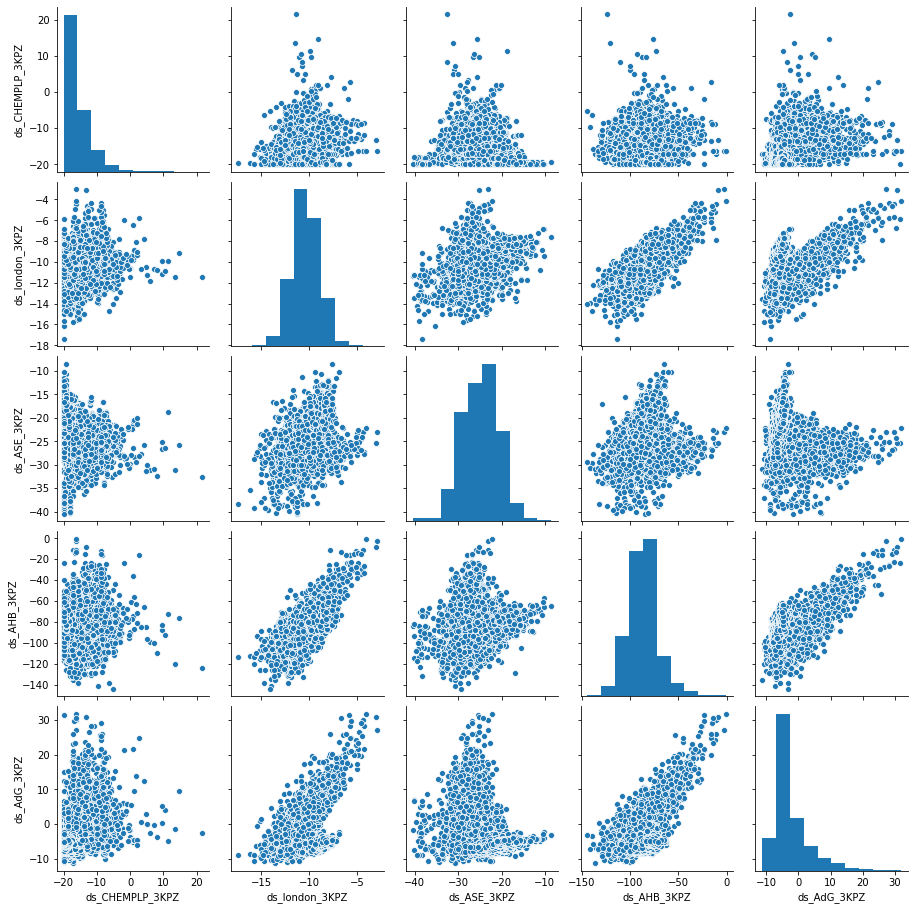

In [11]:
cols = df.columns
names_3KPZ = ['ds_CHEMPLP_3KPZ',
        'ds_london_3KPZ',  'ds_ASE_3KPZ',
        'ds_AHB_3KPZ', 'ds_AdG_3KPZ']
sns.pairplot(df[names_3KPZ])

In [106]:
names_1DB1 = ['ds_CHEMPLP_1DB1',
        'ds_london_1DB1',  'ds_ASE_1DB1',
        'ds_AHB_1DB1', 'ds_AdG_1DB1']

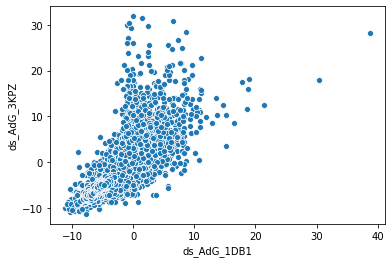

In [109]:
i = 4
sns.scatterplot(df[names_1DB1[i]], df[names_3KPZ[i]])

In [110]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

x = np.array(fps_pca) #reshape(-1,1)
y = np.array(df.ds_AdG_3KPZ).ravel()#reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=1)
'''
estimators = [
     ('rfr', RandomForestRegressor(max_depth=500, random_state=0)),
     ('svr', LinearSVR(random_state=42))]

model = StackingRegressor(
     estimators=estimators,
     final_estimator=MLPRegressor(random_state=0, max_iter=5000))
'''
model = MLPRegressor(random_state=0, max_iter=500)
model.fit(X_train, y_train)
    
score = model.score(X_test, y_test)

pred = model.predict(X_test) 
score

0.7763378302506609

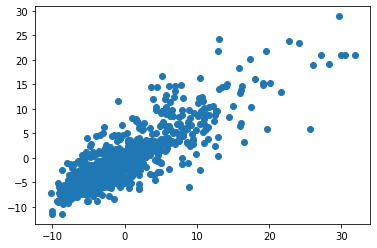

In [111]:
plt.scatter(y_test, pred)

In [52]:
len(fps_pca), len(df.value)

(6715, 6715)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(np.array(fps_pca), np.array(df.value), 
                                                    random_state=1)
reg = RandomForestRegressor(max_depth=500, random_state=0)
reg.fit(X_train, y_train);

pred = reg.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'value'

Mean Absolute Error (MAE): 1.8182440491500196
Mean Squared Error (MSE): 9.528096723865373
Root Mean Squared Error (RMSE): 3.086761526886289
Mean Absolute Percentage Error (MAPE): 211.16
Accuracy: -111.16


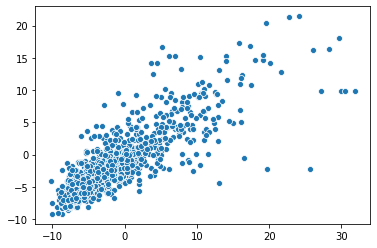

In [96]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

sns.scatterplot(y_test, pred)

In [ ]:
# binning the values

In [22]:
df['categories'] = pd.cut(df.value, bins=3, labels=range(3))

In [11]:
mols = [AllChem.MolFromSmiles(m) for m in df.canonical_smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]

In [ ]:
# Dimension reduction techniques

In [ ]:
# PCA

In [43]:
pca = PCA(0.9)
pca.fit(fps)
fps_pca = pca.transform(fps)

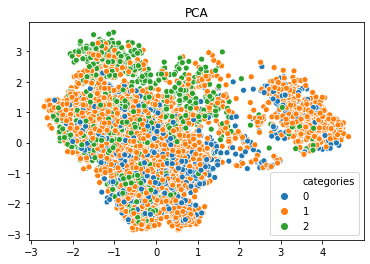

In [23]:
plot = sns.scatterplot(x=fps_pca[:,0], y=fps_pca[:,1], hue=df['categories']).set_title('PCA')

In [24]:
# t-SNE

In [25]:
fps_tsne = TSNE(n_components=2, perplexity=50).fit_transform(fps_pca)

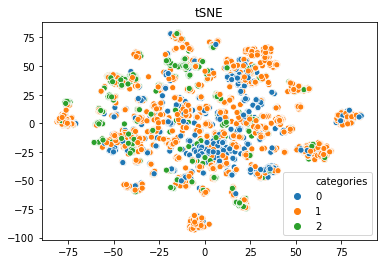

In [31]:
plot = sns.scatterplot(x=fps_tsne[:,0], y=fps_tsne[:,1], hue=df['categories']).set_title('tSNE')

In [28]:
# MDS

In [35]:
sparse_mat = distance.pdist(fps,metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
fps_mds = clf.fit_transform(dist_mat)

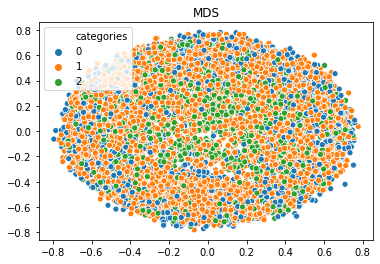

In [36]:
plot = sns.scatterplot(x=fps_mds[:,0], y=fps_mds[:,1], hue=df['categories']).set_title('MDS')

In [ ]:
# SVD

In [40]:
svd = TruncatedSVD(500)
fps_svd = svd.fit_transform(fps)

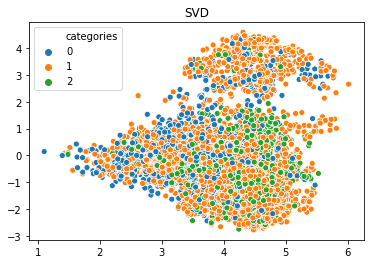

In [41]:
plot = sns.scatterplot(x=fps_svd[:,0], y=fps_svd[:,1], hue=df['categories']).set_title('SVD')